In [1]:
%matplotlib inline
import geopandas as gpd
import pandas as pd
import random
from shapely.geometry import Point
import numpy as np
import geopandas as gpd
# !!! tracer le continent sur les cartes

# Objectif :

1- créer pour chaque point un cercle

2- compter le nombre de stations de métro dans le cercle

3- introduire une nouvelle variable "nombre de stations dans un rayon de 300 m autours du point

## Etape 1 : Créer un cercle de 300 mètres autour de chaque point de la base

In [2]:
# on utilise la base de données des taxi dispo sur le site de NYC
data = 'C:/Users/Adrien/Desktop/bertille/Python projet/Python/yellow_tripdata_2016-06.csv'
# !!! on prend un échantillon de 100 observations pour commencer
df = pd.read_csv(data, sep=',')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-06-09 21:06:36,2016-06-09 21:13:08,2,0.79,-73.983360,40.760937,1,N,-73.977463,40.753979,2,6.0,0.5,0.5,0.00,0.0,0.3,7.30
1,2,2016-06-09 21:06:36,2016-06-09 21:35:11,1,5.22,-73.981720,40.736668,1,N,-73.981636,40.670242,1,22.0,0.5,0.5,4.00,0.0,0.3,27.30
2,2,2016-06-09 21:06:36,2016-06-09 21:13:10,1,1.26,-73.994316,40.751072,1,N,-74.004234,40.742168,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-06-09 21:06:36,2016-06-09 21:36:10,1,7.39,-73.982361,40.773891,1,N,-73.929466,40.851540,1,26.0,0.5,0.5,1.00,0.0,0.3,28.30
4,2,2016-06-09 21:06:36,2016-06-09 21:23:23,1,3.10,-73.987106,40.733173,1,N,-73.985909,40.766445,1,13.5,0.5,0.5,2.96,0.0,0.3,17.76


In [198]:
random.seed(35)
# assez lent, !!! on crée df0 = les 100 premières obs de la grosse base
df0 = df.sample(1000).reset_index()
pts = gpd.GeoSeries([Point(xy) for xy in zip(df0.pickup_longitude, df0.pickup_latitude)])
circles = pts.buffer(0.005)
# le problème c'est qu'on a quelques valeurs très éloignées de la zone, il faut absolument les supprimer
# si on ne les supprime pas (essayer avec les 100 premières obs), le plot (les boroughs de NYC) et le subplot
# (les cercles qu'on a dessiné) ne sont plus tout à la même échelle
# = > on sélectionne les observations dont les pickup coordinates ne sortent pas de la zone de NYC
df0 = df0[(df0['pickup_longitude'] < -73.7) & (df0['pickup_longitude'] > -74.1) & (df0['pickup_latitude'] > 40.4) & (df0['pickup_latitude'] < 51)]

In [199]:
crs = {'init': 'epsg:4326'}
gdf = gpd.GeoDataFrame(df0, crs=crs, geometry=circles)
gdf.head()

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,geometry
0,5227716,1,2016-06-14 21:48:59,2016-06-14 21:59:36,3,2.30,-74.002213,40.726357,1,N,...,40.754387,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80,POLYGON ((-73.99721252441407 40.72635650634766...
1,4297776,2,2016-06-09 19:43:08,2016-06-09 19:50:47,1,0.78,-73.985352,40.739082,1,N,...,40.732704,1,6.5,1.0,0.5,2.08,0.0,0.3,10.38,POLYGON ((-73.98035156250001 40.73908233642577...
2,9178256,2,2016-06-27 11:57:15,2016-06-27 12:00:50,2,0.54,-73.956299,40.764130,1,N,...,40.767750,2,4.5,0.0,0.5,0.00,0.0,0.3,5.30,POLYGON ((-73.95129882812501 40.76412963867188...
3,6969315,2,2016-06-19 13:22:03,2016-06-19 13:32:47,3,1.82,-73.982094,40.766289,1,N,...,40.743591,1,9.5,0.0,0.5,2.06,0.0,0.3,12.36,POLYGON ((-73.97709381103516 40.76628875732422...
4,1183964,1,2016-06-03 18:33:22,2016-06-03 18:47:59,1,1.50,-73.968445,40.754597,1,N,...,40.748795,1,10.5,1.0,0.5,2.45,0.0,0.3,14.75,POLYGON ((-73.96344482421876 40.75459671020508...


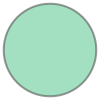

In [200]:
# !!! pb : c'est pas du tout projeté, comment on doit rentrer la distance dans "buffer" ?
df0.loc[5, 'geometry']

In [201]:
g = gpd.GeoDataFrame(df0['geometry'], crs=crs, geometry='geometry')

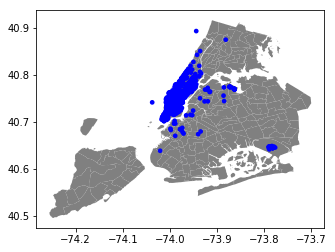

In [202]:
taxishp = 'C:/Users/Adrien/Desktop/bertille/Python projet/Python/shapefile/NYC/taxi_zones.shp'
taxizones = gpd.read_file(taxishp).to_crs({'init' :'epsg:4326'})
ax = taxizones.plot(color="grey")
g.plot(ax=ax, color='blue')
# !!! remarque : on a encore qques points en dehors de la zone (cf points dans le blanc, donc plutôt une sélection
# en fonction du fichier taxizones : le point central doit être sur le graph pour être conservé)